In [9]:
import json
from pprint import pprint
import urllib.request
import csv
import datetime
import requests

tickers=["CY6U","A17U","AU8U","M44U"]

for companyTicker in tickers:
    response=urllib.request.urlopen("https://phone.finance.services.appex.bing.com/MarketV2.svc/XPlat-StockDetailsV1?symbols=143.1."+companyTicker+".SES&lang=EN-GB&isEOD=False&isOTC=False&localizeFor=EN-SG&clientType=TABLET&clientVersion=1&Client-AppVersion=4.26.12334.0")
    content=response.read()
    data = json.loads(content.decode("utf8"))
    response.close()

    #check if object exists
    stockEntityObject=data.get("stockEntityDetails")
    if stockEntityObject:
        #Ticker
        ticker=data["stockEntityDetails"]["Stat"][0]["Tkr"]
        pprint("Ticker: " + ticker)
        #Stock Price
        stockPrice=data["stockEntityDetails"]["Stat"][0]["Sp"]
        pprint("Stock Price: " + str(stockPrice))
        #Market Capital
        marketCapital=data["stockEntityDetails"]["Stat"][0]["Mc"]
        pprint("Market Cap: "+str(marketCapital))
        #Net Income
        netIncome=data["stockDetailsV2"]["Fh"]["In"]
        pprint("Net Income: "+str(netIncome))
        #Shares Outstanding
        outstandingShares=data["stockEntityDetails"]["Stat"][0]["shrsOs"]
        pprint("Shares Outstanding: "+str(outstandingShares))
        #Book Value per Share
        bookValuePerShare=data["stockEntityDetails"]["Stat"][0]["Bvps"]
        pprint("BV Per Share: "+str(bookValuePerShare))
        #Earnings per Share
        earningsPerShare=data["stockEntityDetails"]["Stat"][0]["Eps"]
        pprint("EPS: " + str(earningsPerShare))
        #Price to Earnings ratio
        priceToEarningsRatio=data["stockEntityDetails"]["Stat"][0]["Pe"]
        pprint("P/E: "+str(priceToEarningsRatio))
        #Dividend Yield
        dividendYield=data["stockEntityDetails"]["Stat"][0]["Dy"]
        pprint("Div Yield: "+str(dividendYield))
        #Forward Dividend Yield
        forwardDividendYield=data["stockEntityDetails"]["Stat"][0]["FwdDYld"]
        pprint("Forward Div Yield: "+str(forwardDividendYield))
        #Debt To Equity ratio
        debtToEquityRatio=data["stockEntityDetails"]["Stat"][0]["De"]
        pprint("D/E Ratio: "+str(debtToEquityRatio))

        #Enterprise Value
        enterpriseValue=data["shareStatistics"][0]["EpVl"]
        pprint("Enterprise Value: " + str(enterpriseValue))

        #Last Dividend Amount Paid
        #pprint(data["stockEntityDetails"]["Stat"][0]["AmtPd"])
        #Last Ex-Dividend Date
        #pprint(data["stockEntityDetails"]["Stat"][0]["ExdDt"])
        #Payout Ratio
        payoutRatio=data["stockEntityDetails"]["Stat"][0]["PytRt"]
        pprint("Payout Ratio: "+str(payoutRatio))
        #Quick Ratio
        quickRatio=data["stockEntityDetails"]["Stat"][0]["QckRt"]
        pprint("Quick Ratio: "+str(quickRatio))

        payload = {"id":ticker}
        r = requests.post("https://sgx-premium.wealthmsi.com/sgx/price", data=json.dumps(payload))
        r.headers["Content-Type"]="application/json"
        data=r.json()
        stockHighPrice=data["price"]["highPrice"]
        #Stock Low Price
        stockLowPrice=data["price"]["lowPrice"]

        fields=[datetime.datetime.now().strftime("%Y-%m-%d"),ticker,stockPrice,marketCapital,netIncome,outstandingShares,enterpriseValue,bookValuePerShare,earningsPerShare,priceToEarningsRatio,dividendYield,forwardDividendYield,debtToEquityRatio,payoutRatio,quickRatio,stockHighPrice,stockLowPrice]
        with open("C:\\Users\\admin\\Documents\\Apurva Documents\\Investments\\Stock Data\\"+companyTicker+".csv", "a") as f:
            writer = csv.writer(f)
            writer.writerow(fields)
    else:
         with open("C:\\Users\\admin\\Documents\\Apurva Documents\\Investments\\Stock Data\\log.txt", 'a') as f:
            writer = csv.writer(f)
            fields=[datetime.datetime.now().strftime("%Y-%m-%d %H:%M"),companyTicker,"Stock details wasn't found"]
            writer.writerow(fields)
            f.close()


'Ticker: CY6U'
'Stock Price: 1.11'
'Market Cap: 1151295913.8600001'
'Net Income: 192273000'
'Shares Outstanding: 1037203526'
'BV Per Share: 0.9096'
'EPS: 0.2014'
'P/E: 5.512679'
'Div Yield: 2.96'
'Forward Div Yield: 2.94'
'D/E Ratio: 0.46501'
'Enterprise Value: 1741261913'
'Payout Ratio: 30.29'
'Quick Ratio: 0.294996'
'Ticker: A17U'
'Stock Price: 2.63'
'Market Cap: 7707033674.65'
'Net Income: 488667000'
'Shares Outstanding: 2930431055'
'BV Per Share: 2.175'
'EPS: 0.16205'
'P/E: 16.233766'
'Div Yield: 5.03'
'Forward Div Yield: 5.03'
'D/E Ratio: 0.405233'
'Enterprise Value: 11359612674'
'Payout Ratio: 95.23'
'Quick Ratio: 0.037271'
'Ticker: AU8U'
'Stock Price: 1.44'
'Market Cap: 1396722985.9199998'
'Net Income: 152421000'
'Shares Outstanding: 969946518'
'BV Per Share: 1.7098'
'EPS: 0.164'
'P/E: 8.779631'
'Div Yield: 6.85'
'Forward Div Yield: 6.85'
'D/E Ratio: 0.602318'
'Enterprise Value: 2282904985'
'Payout Ratio: 28.9'
'Quick Ratio: 4.885881'
'Ticker: M44U'
'Stock Price: 1.26'
'Market C

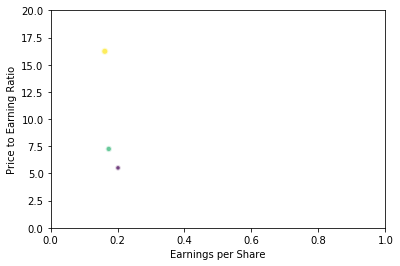

In [2]:
import matplotlib.pyplot as plt

#ticker
ticker=["CY6U","A17U","M44U"]
#EPS
x=[0.2014,0.16205,0.1738]
#PE
y=[5.512679,16.233766,7.251632]

size=[30,50,40]
color=[2,5,4]

sct = plt.scatter(x, y, c=color, s=size, linewidths=2, edgecolor='w')
sct.set_alpha(0.75)

#text labels
#plt.text(x,y,text,size=11,horizontalalignment='center')

plt.axis([0,1,0,20])
plt.xlabel('Earnings per Share')
plt.ylabel('Price to Earning Ratio')
plt.show()